In [3]:
#task 1
scores = [55 , 92 , 78 , 60 , 85 , 78 , 90 , 66 , 73 , 88]

In [4]:
mean = 0
mean_sum=0
length=len(scores)
for i in range(0,10,1):
    mean_sum += scores[i]
mean = mean_sum/length
print(mean_sum)
print("Mean is ", mean)

765
Mean is  76.5


In [5]:
scores.sort()
print(scores)

[55, 60, 66, 73, 78, 78, 85, 88, 90, 92]


In [6]:
median_sum = scores[4]+scores[5]
median=median_sum/2
print("Median is ",median)

Median is  78.0


In [7]:

frequency = {}
for item in scores:
    if item in frequency:
        frequency[item] += 1
    else:
        frequency[item] = 1

print(frequency)


{55: 1, 60: 1, 66: 1, 73: 1, 78: 2, 85: 1, 88: 1, 90: 1, 92: 1}


In [8]:
mode = max(frequency, key=frequency.get )
print(mode)
#I'm a bit confused for this one. I used W3 schools for the syntax in line 1. Could you please explain this in the next session?

78


In [9]:
num_range= max(scores) - min(scores)
print("Range:", num_range)

Range: 37


In [10]:
import math
freq_diff = {}
for item in scores:
    freq_diff[item]=(item-mean)**2
sum_variance=0
for item in freq_diff:
    sum_variance+=freq_diff[item]
variance=sum_variance/length
print("Variance", variance)

Variance 148.625


In [11]:
st_dev= variance**0.5
print("Standard deviation is",st_dev)

Standard deviation is 12.19118534023661


In [12]:
import numpy as np
from scipy import stats
mean=np.mean(scores)
median=np.median(scores)
maximum=np.max(scores)
minimum=np.min(scores)
new_range=maximum-minimum
mode=scipy.stats.mode(scores)
print("Mean, median, range, mode",mean,median,new_range,mode)
#I didn't understand how we can use Numpy to find out the mode

Mean, median, range, mode 76.5 78.0 37 ModeResult(mode=np.int64(78), count=np.int64(2))


In [13]:
#task 2
X_experience = np . array ([1 , 2 , 3 , 4 , 5 , 6 , 7 , 8]) . reshape ( -1 , 1)
Y_salary = np . array ([45 , 50 , 60 , 65 , 75 , 80 , 90 , 95])
m=7
c=40
Y_predicted = X_experience*m+c
print(Y_predicted)

[[47]
 [54]
 [61]
 [68]
 [75]
 [82]
 [89]
 [96]]


In [14]:
#Task 3
import numpy as np

X_prep_hours = np.array([0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]).reshape(-1, 1)
Y_pass_fail = np.array([0, 0, 0, 0, 1, 0, 1, 1, 1, 1])

m = 2
c = -5

z = m * X_prep_hours + c

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

probabilities = sigmoid(z)
predicted_classes = (probabilities >= 0.5).astype(int)

correct_predictions = (predicted_classes.flatten() == Y_pass_fail).sum()
accuracy = correct_predictions / len(Y_pass_fail)

print("Z values (mX + c):", z.flatten())
print("Predicted Probabilities (sigmoid):", probabilities.flatten())
print("Predicted Classes (0 or 1):", predicted_classes.flatten())
print("Actual Classes:", Y_pass_fail)
print("Accuracy:", accuracy)


Z values (mX + c): [-4. -3. -2. -1.  0.  1.  2.  3.  4.  5.]
Predicted Probabilities (sigmoid): [0.01798621 0.04742587 0.11920292 0.26894142 0.5        0.73105858
 0.88079708 0.95257413 0.98201379 0.99330715]
Predicted Classes (0 or 1): [0 0 0 0 1 1 1 1 1 1]
Actual Classes: [0 0 0 0 1 0 1 1 1 1]
Accuracy: 0.9


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix


X_prep_hours = np.array([0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]).reshape(-1, 1)
Y_pass_fail = np.array([0, 0, 0, 0, 1, 0, 1, 1, 1, 1])


model = LogisticRegression(solver='liblinear')
model.fit(X_prep_hours, Y_pass_fail)


print("Learned coefficient (m):", model.coef_[0][0])
print("Learned intercept (c):", model.intercept_[0])


y_pred = model.predict(X_prep_hours)
print("Predictions:", y_pred)


accuracy = accuracy_score(Y_pass_fail, y_pred)
conf_matrix = confusion_matrix(Y_pass_fail, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)

##Interpretation: The accuracy score tells us how accurate the model is in prediction. Here, the accuracy is 0.8 so the model predicts correctly 
#80% of the time. True Negatives : Students who failed and were correctly predicted to fail
# False Positives : Students who failed but were incorrectly predicted to pass
# False Negatives : Students who passed but were incorrectly predicted to fail  
#True Positives : Students who passed and were correctly predicted to pass

Learned coefficient (m): 0.5361985605622785
Learned intercept (c): -1.0077449163597512
Predictions: [0 0 0 1 1 1 1 1 1 1]
Accuracy: 0.8
Confusion Matrix:
[[3 2]
 [0 5]]


In [ ]:

X_cluster_data = np.array([
    [2, 10], [2, 5], [8, 4], [5, 8], [7, 5], [6, 4], [1, 2], [4, 9]
])

print("=== Task 4.1: Manual K-Means Iterations ===")


C1 = np.array([2, 10])  # First point as Centroid 1
C2 = np.array([2, 5])   # Second point as Centroid 2

print("Initial centroids:")
print(f"C1 = {C1}")
print(f"C2 = {C2}")


print("\nIteration 1 - Assignment Step:")
print("Point | Coordinates | Distance to C1 | Distance to C2 | Assigned to")
print("-" * 70)

cluster_assignments = []
for i, point in enumerate(X_cluster_data):
    
    dist_to_C1 = np.sqrt(np.sum((point - C1)**2))
    dist_to_C2 = np.sqrt(np.sum((point - C2)**2))
    
    
    if dist_to_C1 < dist_to_C2:
        assigned_cluster = 1
    else:
        assigned_cluster = 2
    
    cluster_assignments.append(assigned_cluster)
    
    print(f"  {i}   |    {point}     |     {dist_to_C1:.2f}      |     {dist_to_C2:.2f}      | Cluster {assigned_cluster}")


print("\nIteration 1 - Update Step:")

cluster_1_points = []
cluster_2_points = []

for i, assignment in enumerate(cluster_assignments):
    if assignment == 1:
        cluster_1_points.append(X_cluster_data[i])
    else:
        cluster_2_points.append(X_cluster_data[i])

if cluster_1_points:
    new_C1 = np.mean(cluster_1_points, axis=0)
else:
    new_C1 = C1
    
if cluster_2_points:
    new_C2 = np.mean(cluster_2_points, axis=0)
else:
    new_C2 = C2

print(f"New C1 = {new_C1}")
print(f"New C2 = {new_C2}")

print("\nIteration 2 - Assignment Step:")
print("Point | Coordinates | Distance to new C1 | Distance to new C2 | Assigned to")
print("-" * 78)

new_cluster_assignments = []
for i, point in enumerate(X_cluster_data):
   
    dist_to_new_C1 = np.sqrt(np.sum((point - new_C1)**2))
    dist_to_new_C2 = np.sqrt(np.sum((point - new_C2)**2))
    
  
    if dist_to_new_C1 < dist_to_new_C2:
        assigned_cluster = 1
    else:
        assigned_cluster = 2
    
    new_cluster_assignments.append(assigned_cluster)
    
    print(f"  {i}   |    {point}     |       {dist_to_new_C1:.2f}        |       {dist_to_new_C2:.2f}        | Cluster {assigned_cluster}")

print("\nFinal manual results after 2 iterations:")
print(f"Final C1 = {new_C1}")
print(f"Final C2 = {new_C2}")
print(f"Final assignments: {new_cluster_assignments}")
#I had to take the help of Chatgpt because I was not familiar with the mathematical concepts

=== Task 4.1: Manual K-Means Iterations ===
Initial centroids:
C1 = [ 2 10]
C2 = [2 5]

Iteration 1 - Assignment Step:
Point | Coordinates | Distance to C1 | Distance to C2 | Assigned to
----------------------------------------------------------------------
  0   |    [ 2 10]     |     0.00      |     5.00      | Cluster 1
  1   |    [2 5]     |     5.00      |     0.00      | Cluster 2
  2   |    [8 4]     |     8.49      |     6.08      | Cluster 2
  3   |    [5 8]     |     3.61      |     4.24      | Cluster 1
  4   |    [7 5]     |     7.07      |     5.00      | Cluster 2
  5   |    [6 4]     |     7.21      |     4.12      | Cluster 2
  6   |    [1 2]     |     8.06      |     3.16      | Cluster 2
  7   |    [4 9]     |     2.24      |     4.47      | Cluster 1

Iteration 1 - Update Step:
New C1 = [3.66666667 9.        ]
New C2 = [4.8 4. ]

Iteration 2 - Assignment Step:
Point | Coordinates | Distance to new C1 | Distance to new C2 | Assigned to
--------------------------------

Final cluster centroids:
Centroid 0: [5.5  3.75]
Centroid 1: [3.25 8.  ]

Cluster labels for each data point:
Point 0 [ 2 10] -> Cluster 1
Point 1 [2 5] -> Cluster 1
Point 2 [8 4] -> Cluster 0
Point 3 [5 8] -> Cluster 1
Point 4 [7 5] -> Cluster 0
Point 5 [6 4] -> Cluster 0
Point 6 [1 2] -> Cluster 0
Point 7 [4 9] -> Cluster 1


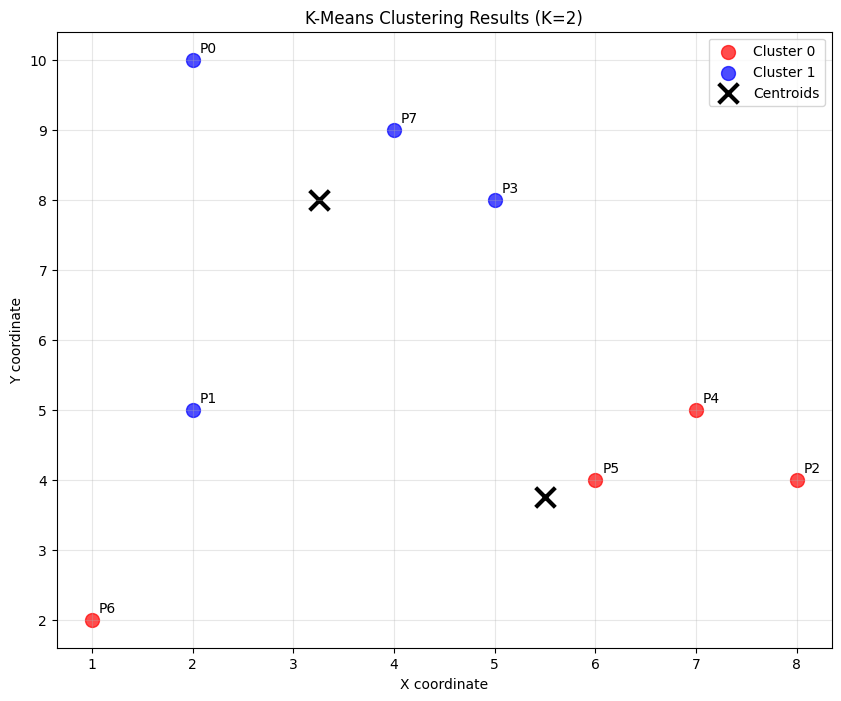

In [21]:

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


X_cluster_data = np.array([
    [2, 10], [2, 5], [8, 4], [5, 8], [7, 5], [6, 4], [1, 2], [4, 9]
])


kmeans = KMeans(n_clusters=2, random_state=42, n_init='auto')
kmeans.fit(X_cluster_data)

print("Final cluster centroids:")
print("Centroid 0:", kmeans.cluster_centers_[0])
print("Centroid 1:", kmeans.cluster_centers_[1])


print("\nCluster labels for each data point:")
for i, label in enumerate(kmeans.labels_):
    print(f"Point {i} {X_cluster_data[i]} -> Cluster {label}")

# 4. Compare with manual results:
# The scikit-learn results mauy differ from manual calculations because:
# -  Manual used first two points [2,10] and [2,5] as initial centroids,
#   while scikit-learn uses ransdom initialization (even with random_state=42)
# -  Scikit-learn runs until convergence, while manual only did 1-2 iterations
# - The algorithm is sensitive to initialization, so different starting points can lead to different results

plt.figure(figsize=(10, 8))

colors = ['red', 'blue']
for i in range(2):
    cluster_points = X_cluster_data[kmeans.labels_ == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], 
                c=colors[i], label=f'Cluster {i}', s=100, alpha=0.7)

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            c='black', marker='x', s=200, linewidths=3, label='Centroids')

for i, point in enumerate(X_cluster_data):
    plt.annotate(f'P{i}', (point[0], point[1]), xytext=(5, 5), 
                textcoords='offset points', fontsize=10)

plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')
plt.title('K-Means Clustering Results (K=2)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()